In [21]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

from decimal import *

In [107]:
conn = psycopg2.connect(dbname='admt_g02', user='admt_g02', password='xi6aeSoo', host='alcor.inf.unibz.it', port=5433)
cur = conn.cursor()

In [100]:
cur.execute('SELECT year_actual, month_actual, this_month, average_last_months FROM ( \
SELECT year_actual, month_actual, sum(raw_material_cost) as this_month,  \
		ROUND(AVG(SUM(raw_material_cost)) \
			OVER ( ORDER BY year_actual, month_actual \
			ROWS BETWEEN 6 PRECEDING \
			AND CURRENT ROW)::numeric,2) as average_last_months \
	FROM warehouse.production \
	JOIN warehouse.date ON date.date_id = production.end_date_id \
	GROUP BY year_actual, month_actual \
	ORDER BY year_actual, month_actual) as foo where year_actual = 2017;') 

res = cur.fetchall()

In [33]:
res

[(2017, 1, 2110974, Decimal('2129943.86')),
 (2017, 2, 2008490, Decimal('2120496.29')),
 (2017, 3, 2246238, Decimal('2136191.86')),
 (2017, 4, 1775081, Decimal('2065783.71')),
 (2017, 5, 2194679, Decimal('2073630.86')),
 (2017, 6, 2084510, Decimal('2066254.71')),
 (2017, 7, 2138008, Decimal('2079711.43')),
 (2017, 8, 2125828, Decimal('2081833.43')),
 (2017, 9, 2070150, Decimal('2090642.00')),
 (2017, 10, 2164744, Decimal('2079000.00')),
 (2017, 11, 2059218, Decimal('2119591.00')),
 (2017, 12, 1822067, Decimal('2066360.71'))]

In [43]:
x = [r[1] for r in res]
y1 = [r[2] for r in res]
y2 = [float(r[3]) for r in res]

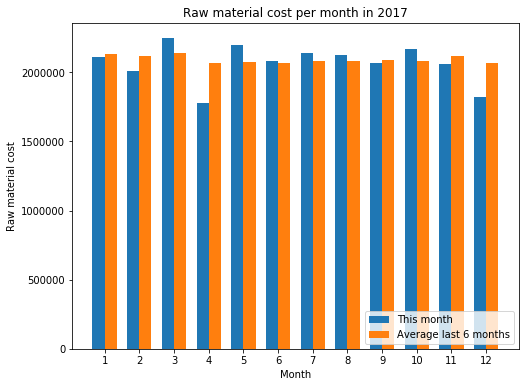

In [46]:
ind = np.arange(len(x))  
width = 0.35

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.bar(ind, y1, width, label='This month')
ax.bar(ind+width, y2, width, label='Average last 6 months')

ax.set_xlabel('Month')
ax.set_ylabel('Raw material cost')
ax.set_title('Raw material cost per month in 2017')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

ax.legend(loc='lower right')

plt.savefig('raw_costs')

In [63]:
cur.execute('SELECT date_actual, this_day, average_last_week \
FROM ( SELECT date_actual, year_actual, month_actual, sum(order_total_price) as this_day,  \
		ROUND(AVG(SUM(order_total_price)) \
			OVER ( ORDER BY date_actual \
			ROWS BETWEEN 7 PRECEDING \
			AND CURRENT ROW)::numeric,2) as average_last_week \
	FROM warehouse.showroom_visit \
	JOIN warehouse.date using (date_id) \
	JOIN warehouse.order using (order_id) \
	GROUP BY date_actual, year_actual, month_actual \
	ORDER BY date_actual) as res where year_actual = 2017 and month_actual = 12;')

res = cur.fetchall()

In [64]:
res

[(datetime.date(2017, 12, 1), Decimal('286042.56'), Decimal('167090.09')),
 (datetime.date(2017, 12, 2), Decimal('74202.10'), Decimal('145876.21')),
 (datetime.date(2017, 12, 3), Decimal('160355.50'), Decimal('139417.92')),
 (datetime.date(2017, 12, 4), Decimal('160878.18'), Decimal('123723.15')),
 (datetime.date(2017, 12, 5), Decimal('82365.34'), Decimal('128601.86')),
 (datetime.date(2017, 12, 6), Decimal('107854.20'), Decimal('135022.24')),
 (datetime.date(2017, 12, 7), Decimal('71560.69'), Decimal('129131.92')),
 (datetime.date(2017, 12, 8), Decimal('174917.32'), Decimal('139771.99')),
 (datetime.date(2017, 12, 9), Decimal('296196.43'), Decimal('141041.22')),
 (datetime.date(2017, 12, 10), Decimal('203603.47'), Decimal('157216.39')),
 (datetime.date(2017, 12, 11), Decimal('64961.24'), Decimal('145292.11')),
 (datetime.date(2017, 12, 12), Decimal('91883.11'), Decimal('136667.73')),
 (datetime.date(2017, 12, 14), Decimal('102757.65'), Decimal('139216.76')),
 (datetime.date(2017, 12, 

In [65]:
x = [r[0] for r in res]
y1 = [float(r[1]) for r in res]
y2 = [float(r[2]) for r in res]

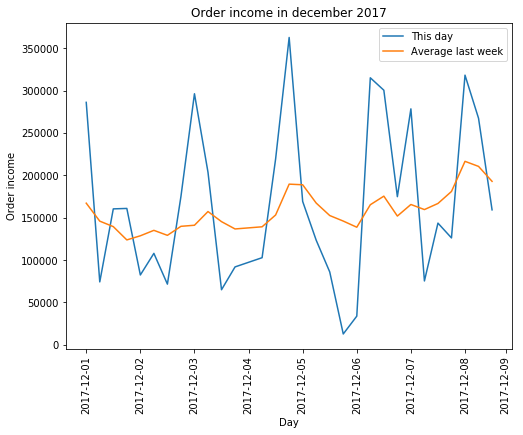

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x, y1, label='This day')
ax.plot(x, y2, label='Average last week')

ax.set_xlabel('Day')
ax.set_ylabel('Order income')
ax.set_title('Order income in december 2017')
ax.set_xticklabels(x, rotation='vertical')

ax.legend(loc='upper right')

plt.savefig('order_income')

In [89]:
cur.execute('SELECT year_actual, quarter_actual, \
	visitors_this_year, visitors_last_year, \
	visitors_this_year - visitors_last_year as difference \
	FROM ( \
		SELECT year_actual, quarter_actual, \
			count(visitor_id) as visitors_this_year, \
			LAG(count(visitor_id), 4) OVER (ORDER BY year_actual, quarter_actual) as visitors_last_year  \
		FROM warehouse.showroom_visit \
			JOIN warehouse.date using (date_id) \
			JOIN warehouse.order using (order_id) \
			GROUP BY year_actual, quarter_actual \
			ORDER BY year_actual, quarter_actual) as last_year \
		WHERE year_actual > 2015;')

res = cur.fetchall()

In [90]:
res

[(2016, 1, 433, 398, 35),
 (2016, 2, 186, 223, -37),
 (2016, 3, 158, 130, 28),
 (2016, 4, 458, 367, 91),
 (2017, 1, 448, 433, 15),
 (2017, 2, 247, 186, 61),
 (2017, 3, 176, 158, 18),
 (2017, 4, 400, 458, -58),
 (2018, 1, 504, 448, 56),
 (2018, 2, 297, 247, 50),
 (2018, 3, 173, 176, -3),
 (2018, 4, 484, 400, 84)]

In [91]:
x = [f'{r[1]}-{r[0]}' for r in res]
y1 = [r[2] for r in res]
y2 = [r[3] for r in res]

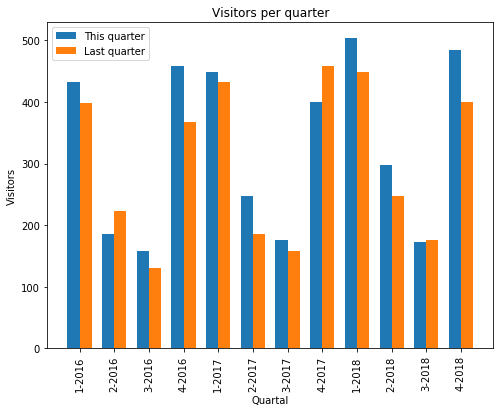

In [93]:
ind = np.arange(len(x))  
width = 0.35

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.bar(ind, y1, width, label='This quarter')
ax.bar(ind+width, y2, width, label='Last quarter')

ax.set_xlabel('Quartal')
ax.set_ylabel('Visitors')
ax.set_title('Visitors per quarter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x, rotation='vertical')

ax.legend(loc='best')

plt.savefig('visitors_quartal')

In [ ]:
conn.commit()
cur.close()
conn.close()